# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Annotations table

This part is a first visualisation of the table

In [2]:
df = pd.read_csv('Annotations.csv')

In [3]:
df

,video,label,start,end
0,1.mp4,JumpingJack,00:15,00:35
1,1.mp4,WallSitt,00:55,01:15
2,1.mp4,PushUps,01:36,01:56
3,1.mp4,Crunches,02:16,02:36
4,1.mp4,StepUps,02:56,03:16
...,...,...,...,...
388,30 - 7 Minute Workout Full Video.mp4,Plank,05:57,06:02
389,30 - 7 Minute Workout Full Video.mp4,HighKnees,06:40,06:46
390,30 - 7 Minute Workout Full Video.mp4,Lunges,07:27,07:40
391,30 - 7 Minute Workout Full Video.mp4,PushUpWR,08:11,08:27


### Comment
The name of each column are "stripped", which means that all space at the beginning or the end is removed. This is done to make it easier to call the columns further in the project.
Two new columns are created, containing the starting and ending time of each video in second as an int. This is to make it easier to load the video further in the project.

In [4]:
df.columns = [col.strip() for col in df.columns]

for col in ['start', 'end']:
    new_col = []
    for i in range(len(df)):
        minute = df.loc[i, col].strip().split(':')[0]
        second = df.loc[i, col].strip().split(':')[1]
        new_col.append(60*int(minute)+int(second))
    df[col+'_sec'] = new_col  

In [5]:
df

,video,label,start,end,start_sec,end_sec
0,1.mp4,JumpingJack,00:15,00:35,15,35
1,1.mp4,WallSitt,00:55,01:15,55,75
2,1.mp4,PushUps,01:36,01:56,96,116
3,1.mp4,Crunches,02:16,02:36,136,156
4,1.mp4,StepUps,02:56,03:16,176,196
...,...,...,...,...,...,...
388,30 - 7 Minute Workout Full Video.mp4,Plank,05:57,06:02,357,362
389,30 - 7 Minute Workout Full Video.mp4,HighKnees,06:40,06:46,400,406
390,30 - 7 Minute Workout Full Video.mp4,Lunges,07:27,07:40,447,460
391,30 - 7 Minute Workout Full Video.mp4,PushUpWR,08:11,08:27,491,507


# Checking for mistakes in the table

### Comment
This first code is done to be sure that all the videos named in the annotations are indeed present in the dataset.

In [6]:
annotated_videos = list(df.loc[:, 'video'])
dataset_videos = os.listdir('./Raw_data/')
for index, video in enumerate(annotated_videos):
    if video in dataset_videos:
        pass
    else:
        print('Video: %s  ||| Index: %d' % (video, index))

Video: 18 - 7 Minute Tabata Workout Song | Full Body.mp4  ||| Index: 207
Video: 18 - 7 Minute Tabata Workout Song | Full Body.mp4  ||| Index: 208
Video: 18 - 7 Minute Tabata Workout Song | Full Body.mp4  ||| Index: 209
Video: 18 - 7 Minute Tabata Workout Song | Full Body.mp4  ||| Index: 210
Video: 18 - 7 Minute Tabata Workout Song | Full Body.mp4  ||| Index: 211
Video: 18 - 7 Minute Tabata Workout Song | Full Body.mp4  ||| Index: 212
Video: 18 - 7 Minute Tabata Workout Song | Full Body.mp4  ||| Index: 213
Video: 18 - 7 Minute Tabata Workout Song | Full Body.mp4  ||| Index: 214
Video: 18 - 7 Minute Tabata Workout Song | Full Body.mp4  ||| Index: 215
Video: 18 - 7 Minute Tabata Workout Song | Full Body.mp4  ||| Index: 216
Video: 18 - 7 Minute Tabata Workout Song | Full Body.mp4  ||| Index: 217
Video: 18 - 7 Minute Tabata Workout Song | Full Body.mp4  ||| Index: 218
Video: 18 - 7 Minute Tabata Workout Song | Full Body.mp4  ||| Index: 219
Video: 18 - 7 Minute Tabata Workout Song | Full Bod

### Result
After a manual check, video 18 is indeed not present in the dataset, but video 22 is: there is just a '.mp4' missing at the end of the file name.

In [7]:
#Correct the file name of 22nd video
df.loc[266, 'video'] = df.loc[266, 'video'] + '.mp4'

In [8]:
#Check that the 22nd video doesn't appear anymore and note the indexes of the lines that need to be dropped
annotated_videos = list(df.loc[:, 'video'])
dataset_videos = os.listdir('./Raw_data/')
indexes = []
for index, video in enumerate(annotated_videos):
    if video in dataset_videos:
        pass
    else:
        print('Video: %s  ||| Index: %d' % (video, index))
        indexes.append(index)

Video: 18 - 7 Minute Tabata Workout Song | Full Body.mp4  ||| Index: 207
Video: 18 - 7 Minute Tabata Workout Song | Full Body.mp4  ||| Index: 208
Video: 18 - 7 Minute Tabata Workout Song | Full Body.mp4  ||| Index: 209
Video: 18 - 7 Minute Tabata Workout Song | Full Body.mp4  ||| Index: 210
Video: 18 - 7 Minute Tabata Workout Song | Full Body.mp4  ||| Index: 211
Video: 18 - 7 Minute Tabata Workout Song | Full Body.mp4  ||| Index: 212
Video: 18 - 7 Minute Tabata Workout Song | Full Body.mp4  ||| Index: 213
Video: 18 - 7 Minute Tabata Workout Song | Full Body.mp4  ||| Index: 214
Video: 18 - 7 Minute Tabata Workout Song | Full Body.mp4  ||| Index: 215
Video: 18 - 7 Minute Tabata Workout Song | Full Body.mp4  ||| Index: 216
Video: 18 - 7 Minute Tabata Workout Song | Full Body.mp4  ||| Index: 217
Video: 18 - 7 Minute Tabata Workout Song | Full Body.mp4  ||| Index: 218
Video: 18 - 7 Minute Tabata Workout Song | Full Body.mp4  ||| Index: 219
Video: 18 - 7 Minute Tabata Workout Song | Full Bod

In [9]:
#Drop the lines corresponding to video 18 that isn't in the dataset
df.drop(index = indexes, inplace = True)
df.reset_index(drop = True, inplace = True)

# Sort the dataset

This part sort the dataset according to the video name and the starting point. This is done to facilitate and optimize the loading of the dataset further in the project.

In [10]:
#Sort the dataframe according to the video name and the starting time of each activity
df.sort_values(['video', 'start_sec'], ascending = [True, True], inplace = True)
df.reset_index(drop = True, inplace = True)

# Check time consistency

Mistake about time are checked; whether two activities are done simultaneously or not and whether the starting time of an activity does not arrive after its ending time.

In [11]:
videos = list(df.loc[:, 'video'])
former_video = ''
for ind, video in enumerate(videos):
    if video != former_video:
        pass
    else:
        end_former = df.loc[ind-1, 'end_sec']
        start_current = df.loc[ind, 'start_sec']
        end_current = df.loc[ind, 'end_sec']
        
        #Checking that an activity doesn't begin before the previous activity finishes
        if end_former >= start_current:
            print('Two activities at the same time for:\nVideo: %s ||| Index: %d \n' % (video, ind))
        
        #Checking that the starting time of an activity doesn't come after the ending time of the same activity
        if start_current >= end_current:
            print('Beginning after the end:\nVideo: %s ||| Index: %d ||| Activity: %s  \n' % (video, ind, df.loc[ind, 'label']))
    former_video = video

Beginning after the end:
Video: 15.mp4 ||| Index: 94 ||| Activity:  Plank  

Beginning after the end:
Video: 16.mp4 ||| Index: 101 ||| Activity:  Plank  

Beginning after the end:
Video: 17.mp4 ||| Index: 105 ||| Activity:  PushUps  

Beginning after the end:
Video: 19 - 7 Minute Workout Song wtimer  Tabata Songs_480p.mp4 ||| Index: 119 ||| Activity:  PushUps  

Beginning after the end:
Video: 21 - Tabata 7 minute workout_480p.mp4 ||| Index: 154 ||| Activity:  Plank  

Beginning after the end:
Video: 22 - 7 Minute Workout Song (Tabata Songs).mp4 ||| Index: 169 ||| Activity:  Plank  

Beginning after the end:
Video: 23 -7 Minute Workout Song KIDS  7.mp4 ||| Index: 182 ||| Activity:  Plank  

Beginning after the end:
Video: 24 - 7 Minute Workout  Tabata Songs wtimer_480p.mp4 ||| Index: 197 ||| Activity:  Plank  

Beginning after the end:
Video: 25 - I tried Inger Houghton's 7 Minute Workout Tabata Songs.mp4 ||| Index: 212 ||| Activity:  Plank  

Beginning after the end:
Video: 26 - 7 Min

### Result
There are a lot of time inconsistencies. The corrections are made by checking manually the times of all these activities noted as mistake. 

In [12]:
#Video 15
df.loc[94, 'end'] = '5:10'
df.loc[94, 'end_sec'] = 5*60 + 10

#Video 16
df.loc[101, 'end'] = '6:12'
df.loc[101, 'end_sec'] = 6*60 + 12

#Video 17
df.loc[105, 'end'] = '2:09'
df.loc[105, 'end_sec'] = 2*60 + 9

#Video 19
df.loc[119, 'end'] = '2:05'
df.loc[119, 'end_sec'] = 2*60 + 5

#Video 21
df.loc[154, 'end'] = '5:16'
df.loc[154, 'end_sec'] = 5*60 + 16

#Video 22
df.loc[169, 'end'] = '5:16'
df.loc[169, 'end_sec'] = 5*60 + 16

#Video 23
df.loc[182, 'end'] = '5:10'
df.loc[182, 'end_sec'] = 5*60 + 10

#Video 24
df.loc[197, 'end'] = '5:16'
df.loc[197, 'end_sec'] = 5*60 + 16

#Video 25
df.loc[212, 'end'] = '5:16'
df.loc[212, 'end_sec'] = 5*60 + 16

#Video 26
df.loc[227, 'end'] = '5:16'
df.loc[227, 'end_sec'] = 5*60 + 16

#Video 28
df.loc[255, 'end'] = '5:16'
df.loc[255, 'end_sec'] = 5*60 + 16

# Class distribution

This part focus on the class distribution and how well the dataset is balanced.

In [13]:
#Build dictionnary conataining information about class distribution
activities = {}
for ind, activity in enumerate(list(df.loc[:, 'label'])):
    activity = activity.strip()
    df.loc[ind, 'label']=activity #save the striped label in the dataframe
    if activity in activities.keys():
        activities[activity] = activities[activity] + 1 
    else:
        activities[activity] = 1

Number of classes: 13


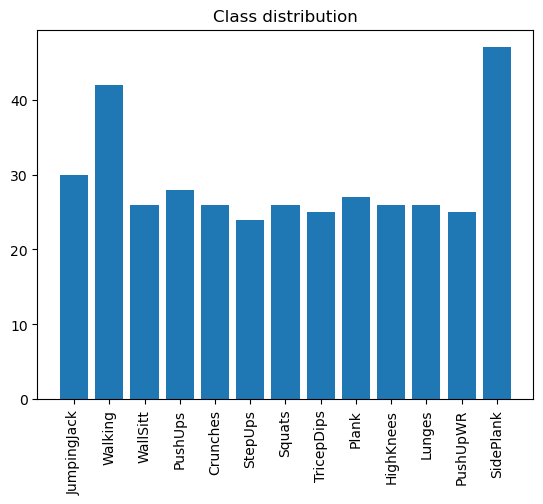

In [14]:
#Display class distribution
print("Number of classes: " + str(len(activities.keys())))
names = list(activities.keys())
values = list(activities.values())
plt.figure()
plt.bar(range(len(activities)), values, tick_label = names)
plt.title('Class distribution')
plt.xticks(rotation = 'vertical')
plt.show()

### Result
The class are pretty well balanced, with maybe a small over-representation of the Walking and the SidePlank.

# Save the modified dataframe

The cleaned annotations table is now saved, and this is the one that will be used after.

In [15]:
df.to_csv('Annotations_cleaned.csv', index = False)